In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score
import seaborn as sns

In [2]:
df = pd.read_csv("combined_dataset.csv")

In [3]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Type'])
print(label_encoder.classes_)

['harmful' 'safe']


In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Content']], y, test_size=0.2, random_state=42)

# Initialize and fit TF-IDF vectorizer on training data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train['Content'])
X_test_transformed = vectorizer.transform(X_test['Content']) 

In [5]:
# Create a svm classfier
clf = svm.SVC(kernel='linear')

# Train the model using training set
clf.fit(X_train_transformed, y_train)

# Predict the response of dataset
y_pred = clf.predict(X_test_transformed)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(clf, X_train_transformed, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and average
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.95    0.9125  0.8625  0.90625 0.89375]
Average cross-validation score: 0.9050


In [6]:
cv_scores = cross_val_score(clf, X_train_transformed, y_train, cv=10, scoring='accuracy')

# Print cross-validation scores and average
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.9875 0.925  0.9    0.9    0.9    0.875  0.95   0.8625 0.9375 0.8625]
Average cross-validation score: 0.9100


In [7]:
cv_scores = cross_val_score(clf, X_train_transformed, y_train, cv=3, scoring='accuracy')

# Print cross-validation scores and average
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.92134831 0.88764045 0.88345865]
Average cross-validation score: 0.8975


In [8]:
# Predict the response on training data
y_train_pred = clf.predict(X_train_transformed)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.99375
Test Accuracy: 0.915


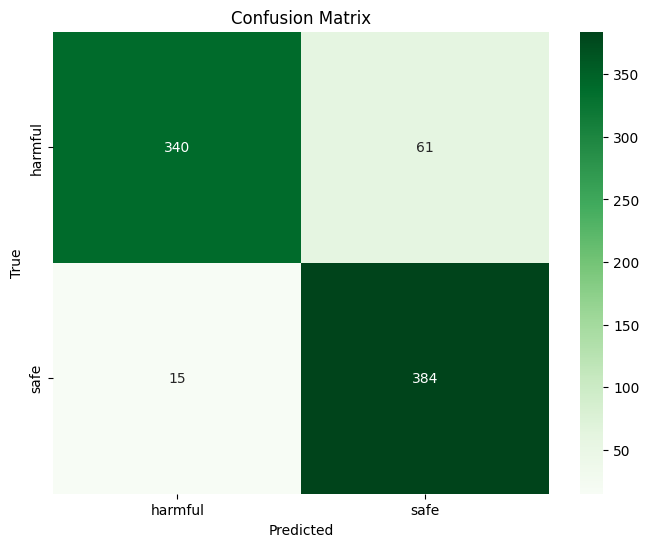

In [9]:

clf.fit(X_train_transformed, y_train)
predictions = cross_val_predict(clf, X_train_transformed, y_train, cv=5)

conf_matrix = confusion_matrix(y_train, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        99
           1       0.91      0.92      0.92       101

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



In [11]:
# Predict on training and test data
y_train_pred = clf.predict(X_train_transformed)
y_test_pred = clf.predict(X_test_transformed)

# Print training accuracy
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train, y_train_pred):.4f}")

# Print test accuracy
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(y_test, y_test_pred):.4f}")

Metrics train:
	Accuracy score: 0.9938
Metrics test:
	Accuracy score: 0.9150


In [12]:
# Example URL to predict
# url = "https://eezxodullgeunn.webflow.io"
# url = "https://www.coursera.org/"
url = "https://google.com"

url_transformed = vectorizer.transform([url])

# Predict using the trained model
decision_prediction = clf.predict(url_transformed)

# Inverse transform the prediction if necessary (e.g., for label encoding)
decision_predicted_class = label_encoder.inverse_transform(decision_prediction)

# Output the prediction (safe or phishing)
print(f"Random Forest prediction for: '{url}' -> {decision_predicted_class[0]}")

Random Forest prediction for: 'https://google.com' -> harmful


In [13]:
# text = "u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 08712405020"
text = "Choose your path. Grow your career. Expert-led programs. Job-ready certificates. 10,000+ ways to grow. All for $25/month, billed annually. Save on Coursera Plus Save on Teams We collaborate with 350+ leading universities and companies Choose your role Gain the knowledge and skills you need to advance. Beginner Popular"

text_transformed = vectorizer.transform([text]) 

# Predict using the trained RandomForest model
decision_prediction = clf.predict(text_transformed)

decision_predicted_class = label_encoder.inverse_transform(decision_prediction)

print(f"Random Forest prediction for: '{text}' -> {decision_predicted_class[0]}")

Random Forest prediction for: 'Choose your path. Grow your career. Expert-led programs. Job-ready certificates. 10,000+ ways to grow. All for $25/month, billed annually. Save on Coursera Plus Save on Teams We collaborate with 350+ leading universities and companies Choose your role Gain the knowledge and skills you need to advance. Beginner Popular' -> safe


In [14]:
import joblib

joblib.dump(clf, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl") 
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']